<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

In [6]:
#loading the data
iris = datasets.load_iris()
X = iris.data
n,d = X.shape

max_iters = 1000

#define number of clusters
k=3

#randomly choose the starting centroids/means as three of the points from datasets
mean = X[np.random.choice(n, k)]

#initialize the variances for each gaussians
Sigma= [np.eye(d)] * k

#initialize the probabilities/weights for each gaussians
w = [1/k] * k

'''
Responsibility matrix is initialized to all zeros.
This matrix contains the data about which point belongs
to which Gaussian
'''
R = np.zeros((n, k))

In [3]:
'''
calculates for each point the probability of belonging to each
gaussian, based on the mean and variance of this gaussian
'''

def prob (sigma,mean): 
    Data = X - mean
    prob = np.sum(np.dot(Data, np.linalg.inv(sigma))*Data, 1)
    prob = np.exp(-0.5*prob)/np.sqrt((np.power((2*np.pi), d))*np.absolute(np.linalg.det(sigma)))      
    return prob 

In [20]:
def E_Step(R):
    for i in range(k):
      # multiply the probability of every point by the weight of the corresponding cluster
        R[:, i] = w[i] * prob (Sigma[i],mean[i])
    # Normalize the responsibility matrix by the sum    
    R = (R.T / np.sum(R, axis = 1)).T
    # Calculate the number of points belonging to each Gaussian
    weight_sum = np.sum(R, axis = 0)
    return  weight_sum ,R

In [5]:
'''
calculate for each gaussian utilizing the new mean, variance and weights
'''
def M_step(weight_sum ):
    for i in range(k):
        mean[i] = 1/weight_sum [i] * np.sum(R[:, i] * X.T, axis = 1).T
        x_mu = np.matrix(X - mean[i])
        Sigma[i] = np.array(1 / weight_sum [i] * np.dot(np.multiply(x_mu.T,  R[:, i]), x_mu))
        w[i] = 1/n * weight_sum [i]

In [7]:
for i in range(max_iters):
    N_ks, R = E_Step(R)
    M_step(N_ks)
   
idx=np.argmax(R, axis=1)
classes=np.unique(idx)   
clusters={}

for i in range(len(idx)):
    for j in range(len(classes)):
        if idx[i]==classes[j]:
           clusters.setdefault(classes[j], []).append(X[i])

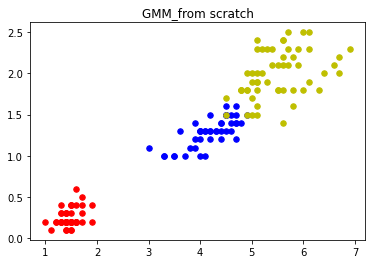

In [17]:
colors=['b','r','y'] 
for j in range(len(classes)):
    dataplot=np.asarray(clusters.get(j))
    plt.scatter(dataplot[:,2],dataplot[:,3],c=colors[j], s=30)

plt.title('GMM_from scratch')    
plt.show()  

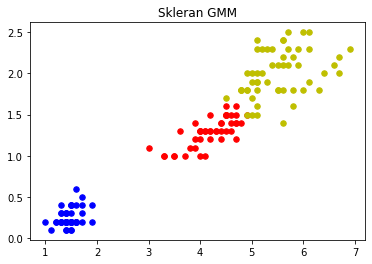

In [19]:
gmm_sk = GaussianMixture(n_components=3, random_state=0).fit_predict(X)

for i in range(len(gmm_sk)):
    for j in range(len(np.unique(gmm_sk))):
        if gmm_sk[i]==np.unique(gmm_sk)[j]:
           plt.scatter(X[i,2],X[i,3],c=colors[j], s=30)

plt.title('Skleran GMM')           
plt.show()